# Data For Diabites   ( Normalization & prediction )

In [4]:
# Class of k-Nearest Neigbor Classifier


class kNN():
    maxTrain = []
    
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
      
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
    # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train   
         
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
    
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test

    
    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
    
        return distance
    
    def normilize_maximum_absolute_scaling(self,df):   
        # copy the dataframe
        df_scaled = df.copy()
        # apply maximum absolute scaling 
        for column in df_scaled.columns:  
            df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
           
        return df_scaled


Original Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
print(X_train)
print(X_test)

plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

Normilize Data

         preg      plas      pres      skin      insu      mass      pedi  \
659  0.176471  0.402010  0.672131  0.313131  0.082742  0.509687  0.533884   
439  0.352941  0.537688  0.721311  0.000000  0.000000  0.548435  0.300413   
72   0.764706  0.633166  0.737705  0.000000  0.000000  0.646796  0.240909   
329  0.352941  0.527638  0.573770  0.323232  0.080378  0.459016  0.050413   
692  0.117647  0.608040  0.573770  0.323232  0.112293  0.582712  0.366116   
..        ...       ...       ...       ...       ...       ...       ...   
369  0.058824  0.668342  0.836066  0.282828  0.165485  0.488823  0.096694   
320  0.235294  0.648241  0.491803  0.121212  0.273050  0.409836  0.217769   
527  0.176471  0.582915  0.606557  0.151515  0.124113  0.391952  0.044215   
125  0.058824  0.442211  0.245902  0.424242  0.117021  0.819672  0.204959   
265  0.294118  0.482412  0.606557  0.181818  0.079196  0.500745  0.411983   

          age  
659  0.333333  
439  0.382716  
72   0.518519  
329  0.4567

Text(0, 0.5, 'Accuracy')

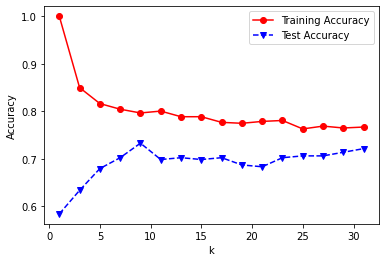

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))

index = 0 
for k  in  k_range:
    clf = kNN(k)
    
    X_train = clf.normilize_maximum_absolute_scaling(X_train)
    X_test = clf.normilize_maximum_absolute_scaling(X_test)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

   
    
# #########################################
# # Plot of training and test accuracies
# #########################################
# # trainAcc
print(X_train)
print(X_test)

plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')


# changing exp for Diabites data

Not Normalize

<ipython-input-1-c08c10cd0486>:69: RuntimeWarning: overflow encountered in double_scalars
  distance = distance + abs(x1[i] - x2[i])**self.exp


Text(0, 0.5, 'Accuracy')

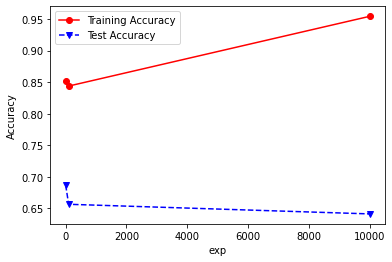

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from numpy.random import random

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))


index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################


plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')


Normilize

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Normalize testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))


index = 0 
for exp  in  exp_range:
    
    clf = kNN(k = 3, exp = exp)
    X_train = clf.normilize_maximum_absolute_scaling(X_train)
    X_test = clf.normilize_maximum_absolute_scaling(X_test)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

    
# #########################################
# # Plot of training and test accuracies
# #########################################
# # trainAcc
print(X_train)
print(X_test)

plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')